#**Desarrollo Taller 1**
Juan Sebastián Morán 818048
Universidad Nacional de Colombia - sede Manizales

#**Punto 1.**
Evaluar la expresión
$$\int_{-\infty}^{\infty} t^{2} e^{- \sin{\left (t \right )}} \cos{\left (2 t \right )} \delta\left(2 t - 2 \pi\right)dt \rightarrow Ec.1$$
Nota: Consultar las propiedas de selectividad y escala en el
tiempo de la funcion impulso unitario. Comprobar el resul- ´
tado en simulacion con la librería SymPy.




##Desarrollo
Por propiedades de la función delta de Dirac se tiene que:
$$\int_{-\infty}^{\infty}f(t) \delta\left(t - t_o\right)dt = f(t_o) \rightarrow Ec.2 $$

Así mismo también se sabe que:
$$\delta\left(at - t_o\right) = \mid a \mid^{-1}\delta(x-\frac{t_o}{a}) \rightarrow Ec.3 $$ 

Ahora, tomando $\delta\left(2 t - 2 \pi\right)$ de la Ec.1 y aplicándole la propiedad de la Ec.3 se obtiene que:

$$\delta\left(2 t - 2 \pi\right) = \frac{1}{2}\delta(t-\pi) \rightarrow Ec.4$$
Reemplazando la Ec.4 en la Ec.1 obtenemos:
$$\int_{-\infty}^{\infty} t^{2} e^{- \sin{\left (t \right )}} \cos{\left (2 t \right )} \frac{1}{2}\delta(t-\pi)dt \rightarrow Ec.5$$
Finalmente, aplicando la propiedad de la Ec.2 en la Ec.5 se obtiene:
$$\int_{-\infty}^{\infty} t^{2} e^{- \sin{\left (t \right )}} \cos{\left (2 t \right )} \frac{1}{2}\delta(t-\pi)dt = \frac{1}{2}\pi^2e^{-sin(\pi)}cos(2\pi) = \frac{\pi^2}{2} \rightarrow Solucion$$

##Simulación 1

In [0]:
import sympy as sp
from sympy import init_printing
init_printing()
t = sp.symbols('t', real = True)
d = sp.DiracDelta((2*t)-2*(sp.pi))
x = (t**2)*(sp.exp(-(sp.sin(t))))*(sp.cos(2*t))

xi = x*d
xii = sp.integrate(xi,(t,-(sp.oo),sp.oo))
xii

$$\frac{\pi^{2}}{2}$$


#**Punto 2.**
Sea $x(t) = u(t−t_o)−u(t−nt_o)−kδ(t−mt_o).$ Determine
el valor de $k$ para el cual $\int_{-\infty}^{\infty}{x(t)}dt = 0.$ Comprobar el
resultado en simulacion con la librería SymPy.

##Desarrollo
Tomamos:
$$a = u(t−t_o)−u(t−nt_o)$$ 
y
$$ b = kδ(t−mt_o)$$
así:
$$x(t) = a-b$$
\
$$\int_{-\infty}^{\infty}{x(t)}dt = \int_{-\infty}^{\infty}adt-\int_{-\infty}^{\infty}bdt = 0$$ \
Resolvemos $\int_{-\infty}^{\infty}adt$ :
$$\int_{-\infty}^{\infty}adt = \int_{-\infty}^{\infty}u(t−t_o)−u(t−nt_o)dt = \int_{t_o}^{nt_o}dt = \mid nt_o-t_o\mid $$ 
\
Resolvemos 
$\int_{-\infty}^{\infty}bdt$

$$\int_{-\infty}^{\infty}bdt = \int_{-\infty}^{\infty}kδ(t−mt_o) = k$$
\
Por lo tanto:
$$\mid nt_o-t_o\mid-k = 0$$
\
$$k = \mid nt_o-t_o\mid = \mid t_o(n-1) \mid$$

##Simulación 2

In [0]:
import sympy as sp
from sympy import init_printing
init_printing()
t, to, n, k, m = sp.symbols('t to n k m', real = True)
ai = sp.integrate(1,(t,to,n*to))
ai


$$n to - to$$

In [0]:
b = k*sp.DiracDelta(t-m*to)
bi = sp.integrate(b,(t,-(sp.oo),sp.oo))
bi

$$k$$

In [0]:
ec = sp.Eq(ai-bi,0)
sp.solve(ec,k)

Resolviendo para k:
$$k = \left [ to \left(n - 1\right)\right ]$$

#**Punto 3**
Consulte en que consisten las señales cuasiperiódicas. Luego, demuestre la periodicidad o no de las siguientes señales:
\
• $x(t) = 3 cos(ωt)$
\
• $x(t) = 2 sin(ωt + π)$
\
•$ x(t) = 3 sin(\sqrt{3}
t) + 3 sin(5t) − 2 cos(t/\sqrt{
3})$
\
•$ x(t) = 3 sin(4t) − 2 cos(50t) + 2 cos(10t)$
\
• $x(t) = e^{jωt}$ \

##Desarrollo




##• $x(t) = 3 cos(ωt)$
\
Se hace $x(t-T)$ 
$$x(t-T)= 3 cos(\omega(t-T))$$
\
$$3cos(\omega(t-T))=3[cos(\omega t)cos(\omega T)+sen(\omega t)sen(\omega T)]$$
Se remplaza: $\omega = \frac{2\pi}{T_o}$ con $T_o = T$
$$3cos(\omega(t-T))=3[cos(\omega t)cos(\frac{2\pi}{T}T )+sen(\omega t)sen(\frac{2\pi}{T} T)]$$
$$3cos(\omega(t-T))=3[cos(\omega t)]$$ por lo tanto $x(t) = 3 cos(ωt) = 3cos(ω(t-T))$ es una función periódica

###**Gráfico**

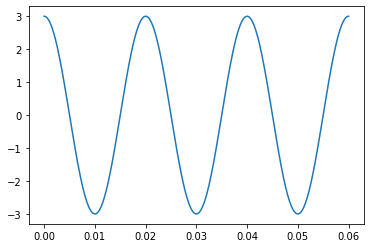

In [22]:
import numpy as np
import matplotlib.pyplot as plt
w = 100*np.pi
f = w/(2*np.pi)
T = 1/f
t = np.linspace(0,3*T,1000)
x = 3*np.cos(w*t)
plt.plot(t,x)

\
##• **$x(t) = 2 sin(ωt + π) = -2sin(\omega t)$**
\
Se hace $x(t+T)$
$$x(t+T) = 2sin(\omega (t+T) + \pi)$$
\
$$2sin(\omega (t+T) + \pi) = 2[sin(\omega (t+T))cos(\pi)+sin(\pi)cos(\omega(t+T))]$$
$$2sin(\omega (t+T) + \pi) = -2[sin(\omega(t+T))]$$
$$2sin(\omega (t+T) + \pi) = -2[sin(\omega t)cos(\omega T)+sin(\omega T)cos(\omega t)]$$
\
Se remplaza: $\omega = \frac{2\pi}{T_o}$ con $T_o = T$
\
$$2sin(\omega (t+T) + \pi) = -2[sin(\omega t)cos(\frac{2\pi}{T}T)+sin(\frac{2\pi}{T}T)cos(\omega t)]$$
$$2sin(\omega (t+T) + \pi) = -2sin(\omega t)$$
\
Por lo tanto $x(t) = 2 sin(ωt + π)  = 2sin(\omega(t+T)+\pi) = -2sin(\omega t) $ y es una función periódica



###**Gráfico**

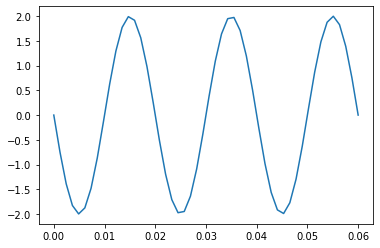

In [7]:
w = 100*np.pi
f = w/(2*np.pi)
T = 1/f
t = np.linspace(0,3*T)
x = 2*np.sin(w*t+np.pi)
plt.plot(t,x)

##•$ x(t) = 3 sin(\sqrt{3}
t) + 3 sin(5t) − 2 cos(t/\sqrt{
3})$
\
Revisando las frecuencias angulares se observa como hay $\sqrt{3}$, por lo tanto la función no es cuasiperiódica


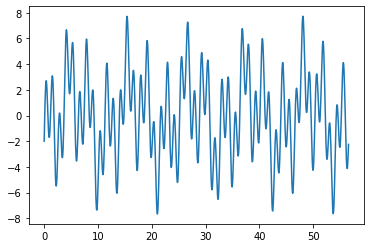

In [17]:
w = 100*np.pi
f = w/(2*np.pi)
T = 6*np.pi
t = np.linspace(0,3*T,1000)
x = 3*np.sin(np.sqrt(3)*t)+3*np.sin(5*t)-2*np.cos(t/np.sqrt(3))
plt.plot(t,x)

##•$ x(t) = 3 sin(4t) − 2 cos(50t) + 2 cos(10t)$
\
Se hace $\omega_1 = 4, \omega_2 = 50, \omega_3 = 10$
\
\
$\frac{\omega_1}{\omega_2}, \frac{\omega_1}{\omega_3}, \frac{\omega_2}{\omega_3}$ son entero sobre entero
\
Se encuentran los periodos:
\
$T_1 = \frac{\pi}{2}; T_2 = \frac{\pi}{25}; T_3 = \frac{\pi}{5}$